<a href="https://colab.research.google.com/github/deepeshaburse/winter-of-contributing/blob/Datascience_With_Python/Datascience_With_Python/Machine%20Learning/Tutorials/Disneyland%20Review%20Analysis/disneyland_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disneyland Reviews Analysis
The aim of this project is to analyse the reviews given by visitors from different countries of the world using Natural Language Processing (NLP) to understand the sentiment of the reviews and classify them using Sentiment Analysis metrics like Sentiment Polarity and VADER Polarity. This processed data is then fed to different classifier models (DecisionTreeClassifier and RandomForestClassifier) to get trained and predict the sentiment of the test reviews.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
df = pd.read_csv("/content/DisneylandReviews.csv", encoding='cp1252', na_values = 'missing', engine='python')

In [3]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
43682,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
43683,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
43684,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
43685,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df.describe()

,Review_ID,Rating
count,4.368700e+04,43687.000000
mean,3.150105e+08,4.210337
std,1.656031e+08,1.067667
min,1.398724e+06,1.000000
25%,1.674681e+08,4.000000
50%,2.850576e+08,5.000000
75%,4.455728e+08,5.000000
max,6.708014e+08,5.000000


In [5]:
df.shape

(43687, 6)

### Dealing with missing values and duplicate data

In [6]:
# Dropping rows with missing values
df.dropna(inplace = True)

In [7]:
df.Review_ID.nunique()

40023

In [8]:
df.Review_ID.value_counts()

163200436    2
161227644    2
162237353    2
168342225    2
146092958    2
            ..
406817124    1
431665507    1
596359522    1
156541281    1
322889295    1
Name: Review_ID, Length: 40023, dtype: int64

In [9]:
# Dropping duplicates and only keeping its first occurrence
df.drop_duplicates(subset="Review_ID",inplace=True,keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40023 entries, 0 to 43148
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          40023 non-null  int64 
 1   Rating             40023 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  40023 non-null  object
 4   Review_Text        40023 non-null  object
 5   Branch             40023 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


### Pre-processing 'Year_Month' column

In [10]:
timeline = df['Year_Month'].str.split('-')
timeline

0         [2019, 4]
1         [2019, 5]
2         [2019, 4]
3         [2019, 4]
4         [2019, 4]
            ...    
43144     [2011, 1]
43145     [2011, 1]
43146    [2010, 12]
43147    [2010, 12]
43148     [2010, 9]
Name: Year_Month, Length: 40023, dtype: object

In [11]:
df['Year'] = timeline.str[0]
df['Month'] = timeline.str[1]

In [12]:
df.drop(["Year_Month"], axis = 1, inplace = True)
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [13]:
year_viz1 = df.groupby('Year', as_index=False).agg({'Rating':'count'})
year_viz1

,Year,Rating
0,2010,143
1,2011,1976
2,2012,4339
3,2013,4709
4,2014,5300
5,2015,6979
6,2016,6599
7,2017,5195
8,2018,3997
9,2019,786


#### Data Visualization

<function matplotlib.pyplot.show>

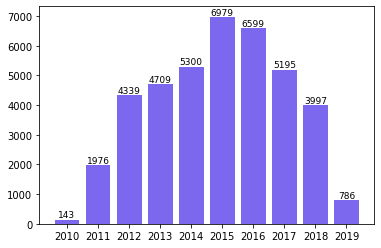

In [14]:
# Data visualization of 'Ratings' vs 'Year'
x = year_viz1['Year']
y = year_viz1['Rating']
plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

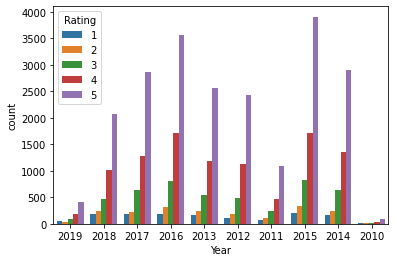

In [15]:
sns.countplot(data = df, x = 'Year', hue = 'Rating')

In [16]:
month_viz1 = df.groupby('Month', as_index=False).agg({'Rating':'count'})
month_viz1

,Month,Rating
0,1,2515
1,10,3764
2,11,2684
3,12,3870
4,2,2459
5,3,3132
6,4,3476
7,5,3436
8,6,3588
9,7,3876


<function matplotlib.pyplot.show>

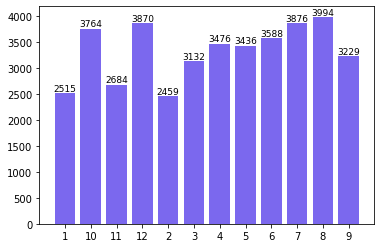

In [17]:
# Data Visualization of 'Month' vs 'Ratings'
x = month_viz1['Month']
y = month_viz1['Rating']
plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [18]:
import plotly.express as px

### Pre-processing the 'Reviewer_Location' column

In [19]:
rlocs_viz = df.groupby('Reviewer_Location', as_index=False).agg({'Rating':'mean'}).sort_values('Rating', ascending=False)

In [20]:
fig = px.choropleth(rlocs_viz, 
                    locations = 'Reviewer_Location', 
                    locationmode = 'country names', 
                    color = 'Rating',
                    hover_data = ['Rating'], 
                    title = 'Average Reviewer Countries')
fig.show()

In [21]:
df.reset_index(inplace=True)
df.shape

(40023, 8)

In [22]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import re

In [23]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


### Pre-processing of Reviews

In [24]:
# Lowering the text
df['Review']= df['Review_Text'].apply(lambda x: x.lower())

In [25]:
# Removing punctuation
def remove_punctuation(text):
    text = " ".join([word.strip(string.punctuation) for word in text.split(" ")])
    return text
df['Review'] = df['Review'].apply(remove_punctuation)

In [26]:
# Removing numbers in words
def remove_numbers_in_word(text):
  text = "".join([word for word in text if not any(c.isdigit() for c in word)])
  return text
df['Review'] = df['Review'].apply(remove_numbers_in_word)

In [27]:
# Converting reviews to tokens, ie, broken into elements of a list
def tokenization(text):
  text = text.split()
  return text
df['Review'] = df['Review'].apply(tokenization)

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
# Stopwords: These words do not add any value to the analysis of the text.
# Removing stopwords like 'I', 'you', etc.
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
name = ['disney', 'disneyland', 'iron', 'ironman', 'mickey', 'buz', 'hk', 'california', 'paris', 'hongkong']

def remove_stopwords(text): 
  stop = stopwords.words('english')
  text = [x for x in text if x not in stop_words and x not in name and x not in punctuation] 
  return text
df['Review'] = df['Review'].apply(remove_stopwords)

In [30]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,"[ever, anywhere, find, hong, kong, similar, la..."
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,"[since, last, time, visit, yet, time, stay, to..."
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,"[thanks, god, hot, humid, visiting, park, othe..."
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,"[great, compact, park, unfortunately, quite, b..."
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,"[location, city, took, around, hour, kowlon, k..."


In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
# Lemmatization: converting words to their base word, for example, 'ran', 'runs', 'run' all reduce to 'run'
# Lemmatizing the reviews
from nltk.stem import WordNetLemmatizer
def lemmatize(text):
  text = [WordNetLemmatizer().lemmatize(word) for word in text]
  return text
df['Review'] = df['Review'].apply(lemmatize)

In [33]:
# Joining all the pre-processed review text
def join_text(text):
  text = " ".join(text)
  return text
df['Review'] = df['Review'].apply(join_text)

In [34]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever anywhere find hong kong similar layout wa...
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit yet time stay tomorrowla...
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,great compact park unfortunately quite bit mai...
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...


In [35]:
# Finding out how many branches of disneyland are included in the data
df.Branch.nunique()

3

In [36]:
df.Branch.value_counts()

Disneyland_California    18196
Disneyland_Paris         12693
Disneyland_HongKong       9134
Name: Branch, dtype: int64

In [37]:
df['Branch'] = df['Branch'].str.slice(start=11)

In [38]:
df

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...
...,...,...,...,...,...,...,...,...,...
40018,43144,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011,1,although pick prompt taxi driver wasnt sure ti...
40019,43145,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011,1,returned day family trip two boy aged reading ...
40020,43146,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010,12,spent dec park lunchtime attraction starting c...
40021,43147,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Paris,2010,12,well really looking forward trip christmas per...


### Data Visualization

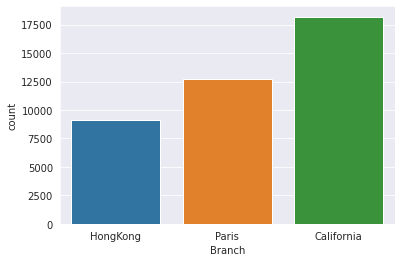

In [39]:
# Plotting number of reviews against branch
sns.set_style("darkgrid")
sns.countplot(x="Branch", data=df)

<function matplotlib.pyplot.show>

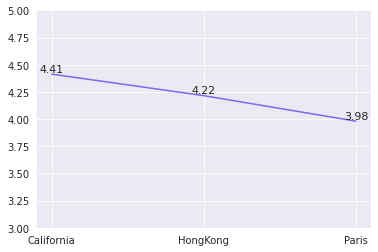

In [40]:
# Plotting average rating of branches
branch_rating = df.groupby('Branch', as_index=False).agg({'Rating':'mean'})

x = branch_rating['Branch']
y = branch_rating['Rating']

plt.plot(x, y, color = 'mediumslateblue')
plt.ylim(3,5)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 11,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

### WordCloud

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [42]:
california = np.array(Image.open(r"/content/california.png"))
hongkong = np.array(Image.open(r"/content/hongkong.png"))
paris = np.array(Image.open(r"/content/paris.png"))

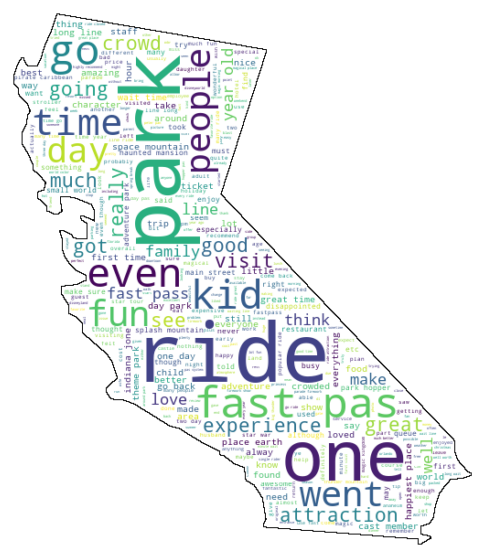

In [43]:
# Creating a wordcloud of the words mostly found in reviews of the California branch.
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = california, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "viridis").generate(" ".join(df[df.Branch == 'California'].Review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

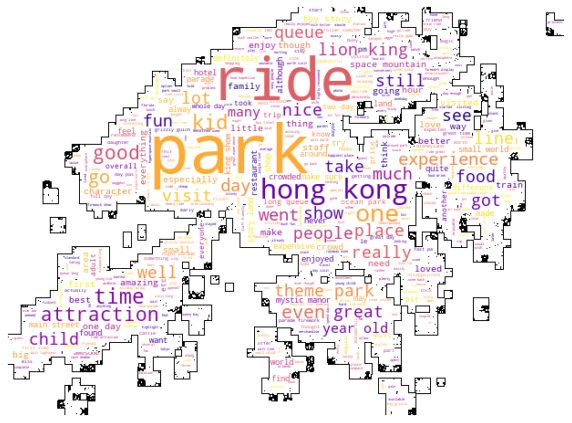

In [44]:
# Creating a wordcloud of the words mostly found in reviews of the Hongkong branch.
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = hongkong, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "plasma").generate(" ".join(df[df.Branch == 'HongKong'].Review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

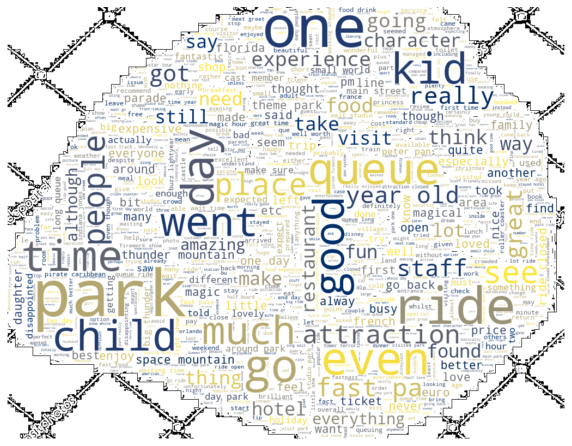

In [45]:
# Creating a wordcloud of the words mostly found in reviews of the Paris branch.
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = paris, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "cividis").generate(" ".join(df[df.Branch == 'Paris'].Review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [46]:
df['Polarity Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review,Polarity Rating
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,Positive
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...,Positive
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,Positive
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...,Positive


## Lexicon based approach of Sentiment Analysis

### Getting the VADER score

In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer=SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [49]:
v_scores = []

for i in df['Review']:
    score = senti_analyzer.polarity_scores(i)
    v_scores.append(score['compound'])

In [50]:
df['VADER_score'] = v_scores
df.groupby("Rating")["VADER_score"].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,1338.0,0.104109,0.698319,-0.9892,-0.612400,0.2263,0.806175,0.9988
2,1929.0,0.365736,0.632350,-0.9871,-0.096000,0.6369,0.902200,0.9984
3,4778.0,0.566184,0.520814,-0.9766,0.371675,0.8122,0.942300,0.9990
4,10079.0,0.766614,0.343682,-0.9938,0.742950,0.9044,0.964800,0.9999
5,21899.0,0.814237,0.273154,-0.9337,0.790600,0.9175,0.967400,0.9999


### Finding the VADER Polarity

In [51]:
df['Vader Rating'] = df['VADER_score'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review,Polarity Rating,VADER_score,Vader Rating
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,Positive,0.7889,Positive
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...,Positive,0.9860,Positive
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9864,Positive
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,Positive,0.8739,Positive
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...,Positive,0.5106,Positive


In [52]:
# Using One-Hot Encoding for the branches of disneyland.
location = pd.get_dummies(df['Branch'])
df = pd.concat([df,location],axis=1)
df

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review,Polarity Rating,VADER_score,Vader Rating,California,HongKong,Paris
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,Positive,0.7889,Positive,0,1,0
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...,Positive,0.9860,Positive,0,1,0
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9864,Positive,0,1,0
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,Positive,0.8739,Positive,0,1,0
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...,Positive,0.5106,Positive,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40018,43144,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011,1,although pick prompt taxi driver wasnt sure ti...,Positive,-0.8507,Negative,0,0,1
40019,43145,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011,1,returned day family trip two boy aged reading ...,Positive,0.9948,Positive,0,0,1
40020,43146,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010,12,spent dec park lunchtime attraction starting c...,Negative,0.8886,Positive,0,0,1
40021,43147,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Paris,2010,12,well really looking forward trip christmas per...,Negative,0.9199,Positive,0,0,1


In [53]:
# Dropping unnecessary columns
df.drop(['Branch','index','Review_Text'],axis=1,inplace=True)
df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Year                  object
Month                 object
Review                object
Polarity Rating       object
VADER_score          float64
Vader Rating          object
California             uint8
HongKong               uint8
Paris                  uint8
dtype: object

### Label Encoding on Reviewer_Location,Year,Polarity Rating, Vader Rating

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Reviewer_Location','Year','Polarity Rating','Vader Rating']:
    df[i] = le.fit_transform(df[i])

In [55]:
df["Month"] = pd.to_numeric(df["Month"])
df

,Review_ID,Rating,Reviewer_Location,Year,Month,Review,Polarity Rating,VADER_score,Vader Rating,California,HongKong,Paris
0,670772142,4,8,9,4,ever anywhere find hong kong similar layout wa...,2,0.7889,2,0,1,0
1,670682799,4,114,9,5,since last time visit yet time stay tomorrowla...,2,0.9860,2,0,1,0
2,670623270,4,151,9,4,thanks god hot humid visiting park otherwise w...,2,0.9864,2,0,1,0
3,670607911,4,8,9,4,great compact park unfortunately quite bit mai...,2,0.8739,2,0,1,0
4,670607296,4,152,9,4,location city took around hour kowlon kid like...,2,0.5106,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40018,92198076,4,152,1,1,although pick prompt taxi driver wasnt sure ti...,2,-0.8507,0,0,0,1
40019,92061774,4,50,1,1,returned day family trip two boy aged reading ...,2,0.9948,2,0,0,1
40020,91995748,1,152,0,12,spent dec park lunchtime attraction starting c...,0,0.8886,2,0,0,1
40021,91984642,2,152,0,12,well really looking forward trip christmas per...,0,0.9199,2,0,0,1


## Review Analysis on the basis of Sentiment Polarity

In [56]:
X = df['Review']
y = df['Polarity Rating']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True)

(32018,) (8005,)


(array([0, 1, 2]), array([ 2614,  3822, 25582]))

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30597 sparse matrix of type '<class 'numpy.float64'>'
	with 1564279 stored elements in Compressed Sparse Row format>

## Using Decision Tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print(dt.score(X_train_vectorized, y_train))
print(dt.score(vect.transform(X_test), y_test))

0.9850396651883315
0.7601499063085572


Training Accuracy : 98.50%

Testing Accuracy : 76.01%

## Using Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print(rf.score(X_train_vectorized, y_train))
print(rf.score(vect.transform(X_test), y_test))

0.9638640764569929
0.8006246096189882


Training Accuracy : 96.39%

Testing Accuracy : 80.06%

## Review Analysis on the basis of VADER Polarity

In [63]:
X = df['Review']
y = df['Vader Rating']

In [64]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True)

(32018,) (8005,)


(array([0, 1, 2]), array([ 2314,   379, 29325]))

In [65]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30546 sparse matrix of type '<class 'numpy.float64'>'
	with 1565950 stored elements in Compressed Sparse Row format>

## Using Decision Tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print(dt.score(X_train_vectorized, y_train))
print(dt.score(vect.transform(X_test), y_test))

0.9922543569242301
0.8934415990006246


Training Accuracy : 99.23%

Testing Accuracy : 89.34%

## Using Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print(rf.score(X_train_vectorized, y_train))
print(rf.score(vect.transform(X_test), y_test))

0.9601161846461366
0.916052467207995


Training Accuracy : 96.01%

Testing Accuracy : 91.61%

## Conclusion

We can conclude that VADER Polarity is a better metric than Sentiment Polarity to analyze reviews.

Random Forest Classifier works better than Decision Tree Classifier in both Sentiment Polarity and VADER Polarity. Even though the training accuracy for Decision Tree Classifier (when trained using VADER Polarity) is higher (99.23%), Random Forest Classifier works better on testing data (accuracy of 91.61%).